In [1]:
import pandas as pd

## Carregando a base de dados diretamente do github

In [73]:
url = 'https://raw.githubusercontent.com/jralbbuquerque/desafio-fadesp-processo-seletivo/master/data/dataset_desafio_fadesp.csv'

df = pd.read_csv(url, sep=',', encoding='latin-1')

print(df.head(3))

   Row ID       Order ID Order Date Ship Date       Ship Mode Customer ID  \
0   42433   AG-2011-2040   1/1/2011  6/1/2011  Standard Class    TB-11280   
1   22253  IN-2011-47883   1/1/2011  8/1/2011  Standard Class    JH-15985   
2   48883   HU-2011-1220   1/1/2011  5/1/2011    Second Class      AT-735   

     Customer Name   Segment         City            State  ...  \
0  Toby Braunhardt  Consumer  Constantine      Constantine  ...   
1      Joseph Holt  Consumer  Wagga Wagga  New South Wales  ...   
2    Annie Thurman  Consumer     Budapest         Budapest  ...   

         Product ID         Category Sub-Category              Product Name  \
0  OFF-TEN-10000025  Office Supplies      Storage       Tenex Lockers, Blue   
1   OFF-SU-10000618  Office Supplies     Supplies  Acme Trimmer, High Speed   
2  OFF-TEN-10001585  Office Supplies      Storage   Tenex Box, Single Width   

     Sales Quantity Discount   Profit  Shipping Cost  Order Priority  
0  408.300        2      0.0  106.

## -------------------------------------------------------------------------------------------------------------------------------
## Limpeza de dados
### Padronização de datas e substituição de valores nulos

#### Antes do tratamento

In [74]:
df = pd.read_csv(url, sep=',', encoding='latin-1')

#destacando estas duas colunas pode-se observar uma inconsistencia na formatação de datas e valores nulos.
print(df[['Order Date','Postal Code']])

       Order Date  Postal Code
0        1/1/2011          NaN
1        1/1/2011          NaN
2        1/1/2011          NaN
3        1/1/2011          NaN
4        1/1/2011          NaN
...           ...          ...
51285  31-12-2014      94533.0
51286  31-12-2014          NaN
51287  31-12-2014          NaN
51288  31-12-2014          NaN
51289  31-12-2014      80538.0

[51290 rows x 2 columns]


#### Depois do tratamento

In [75]:
df = pd.read_csv(url, sep=',', encoding='latin-1')

#substituindo valores nulos por 0.
df.fillna(0, inplace=True)

#padronizando datas dia/mes/ano ou dia-mes-ano para ano-mes-dia.
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y', errors='coerce').fillna(pd.to_datetime(df['Order Date'], format='%d/%m/%Y', errors='coerce'))
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d-%m-%Y', errors='coerce').fillna(pd.to_datetime(df['Ship Date'], format='%d/%m/%Y', errors='coerce'))

print(df[['Order Date','Postal Code']])

      Order Date  Postal Code
0     2011-01-01          0.0
1     2011-01-01          0.0
2     2011-01-01          0.0
3     2011-01-01          0.0
4     2011-01-01          0.0
...          ...          ...
51285 2014-12-31      94533.0
51286 2014-12-31          0.0
51287 2014-12-31          0.0
51288 2014-12-31          0.0
51289 2014-12-31      80538.0

[51290 rows x 2 columns]


## -------------------------------------------------------------------------------------------------------------------------------
## Técnicas para visualização de dados
### Gráfico de vendas ao longo dos anos

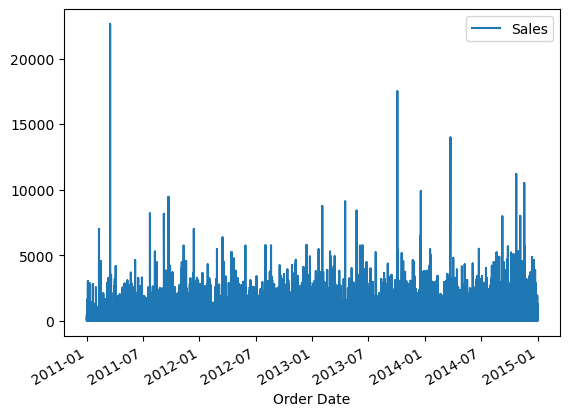

In [76]:
import matplotlib.pyplot as plt

df = pd.read_csv(url, sep=',', encoding='latin-1')

df.fillna(0, inplace=True)

df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y', errors='coerce').fillna(pd.to_datetime(df['Order Date'], format='%d/%m/%Y', errors='coerce'))
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d-%m-%Y', errors='coerce').fillna(pd.to_datetime(df['Ship Date'], format='%d/%m/%Y', errors='coerce'))

#ordenando os dados pela data
df = df.sort_values(by='Order Date')

#criando o gráfico
df.plot(x='Order Date', y='Sales')

plt.show()

### Gráfico de produtos mais vendidos

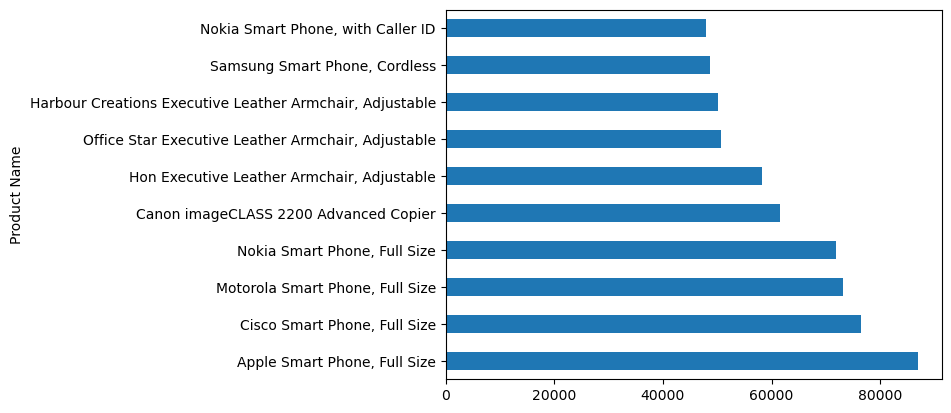

In [77]:
df = pd.read_csv(url, sep=',', encoding='latin-1')

#somando as vendas por produto
salesprod = df.groupby('Product Name')['Sales'].sum()

#selecionando os 10 produtos mais vendidos
topsales = salesprod.nlargest(10)

#criação do gráfico na horizontal, para melhor visualização dos nomes
bargraph = topsales.plot.barh()

plt.show()

## -------------------------------------------------------------------------------------------------------------------------------
## Distribuição geográfica dos produtos mais vendidos
### Top 3 produtos mais vendidos

C:\Users\André\AppData\Local\Temp\ipykernel_1524\3317884741.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('Country').sum().reset_index()


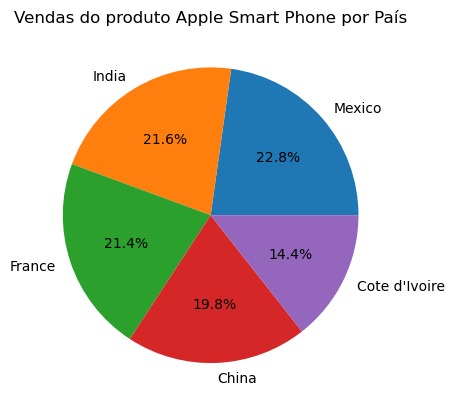

In [78]:
df = pd.read_csv(url, sep=',', encoding='latin-1')

#selecionando o produto em destaque
topsaleprod = 'Apple Smart Phone, Full Size'
df = df[df['Product Name'] == topsaleprod]

#agrupando as vendas por país e selecionando apenas os 5 países com mais vendas
df = df.groupby('Country').sum().reset_index()
df = df.sort_values(by='Sales', ascending=False)
df = df.head(5)

#criação do gráfico
plt.pie(df['Sales'], labels=df['Country'], autopct='%1.1f%%')
plt.title(f'Vendas do produto Apple Smart Phone por País')

plt.show()

C:\Users\André\AppData\Local\Temp\ipykernel_1524\928946653.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('Country').sum().reset_index()


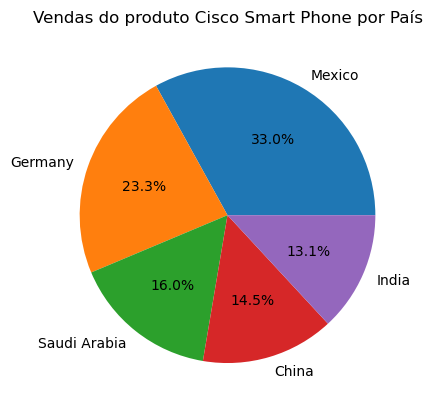

In [79]:
df = pd.read_csv(url, sep=',', encoding='latin-1')

topsaleprod = 'Cisco Smart Phone, Full Size'
df = df[df['Product Name'] == topsaleprod]

df = df.groupby('Country').sum().reset_index()
df = df.sort_values(by='Sales', ascending=False)
df = df.head(5)

plt.pie(df['Sales'], labels=df['Country'], autopct='%1.1f%%')
plt.title(f'Vendas do produto Cisco Smart Phone por País')

plt.show()

C:\Users\André\AppData\Local\Temp\ipykernel_1524\4025494861.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('Country').sum().reset_index()


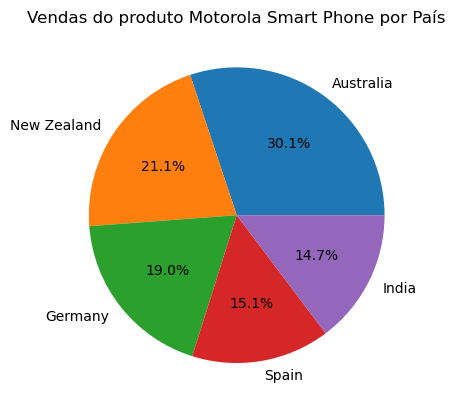

In [80]:
df = pd.read_csv(url, sep=',', encoding='latin-1')

topsaleprod = 'Motorola Smart Phone, Full Size'
df = df[df['Product Name'] == topsaleprod]

df = df.groupby('Country').sum().reset_index()
df = df.sort_values(by='Sales', ascending=False)
df = df.head(5)

plt.pie(df['Sales'], labels=df['Country'], autopct='%1.1f%%')
plt.title(f'Vendas do produto Motorola Smart Phone por País')

plt.show()

## -------------------------------------------------------------------------------------------------------------------------------
## Relação de vendas com outra variável
### Vendas & Tempo de entrega
#### Criando a coluna 'Ship Time'

In [81]:
df = pd.read_csv(url, sep=',', encoding='latin-1')

df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y', errors='coerce').fillna(pd.to_datetime(df['Order Date'], format='%d/%m/%Y', errors='coerce'))
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d-%m-%Y', errors='coerce').fillna(pd.to_datetime(df['Ship Date'], format='%d/%m/%Y', errors='coerce'))

#função para calcular a diferença das datas
def tempoentrega(data1, data2):
    return (data2 - data1)

#aplicando a função em cada par de datas na tabela
df['Ship Time'] = df.apply(lambda row: tempoentrega(row['Order Date'], row['Ship Date']), axis=1)

print(df[['Order Date', 'Ship Date', 'Ship Time']])

      Order Date  Ship Date Ship Time
0     2011-01-01 2011-01-06    5 days
1     2011-01-01 2011-01-08    7 days
2     2011-01-01 2011-01-05    4 days
3     2011-01-01 2011-01-05    4 days
4     2011-01-01 2011-01-08    7 days
...          ...        ...       ...
51285 2014-12-31 2015-01-04    4 days
51286 2014-12-31 2015-01-05    5 days
51287 2014-12-31 2015-01-02    2 days
51288 2014-12-31 2015-01-06    6 days
51289 2014-12-31 2015-01-04    4 days

[51290 rows x 3 columns]


#### Relacionando o tempo de entrega com vendas

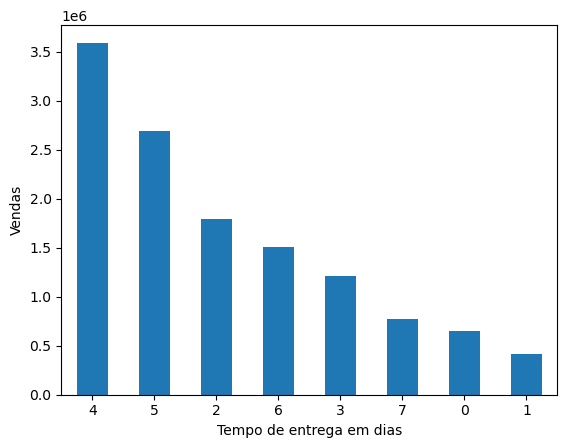

In [82]:
df = pd.read_csv(url, sep=',', encoding='latin-1')

df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y', errors='coerce').fillna(pd.to_datetime(df['Order Date'], format='%d/%m/%Y', errors='coerce'))
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d-%m-%Y', errors='coerce').fillna(pd.to_datetime(df['Ship Date'], format='%d/%m/%Y', errors='coerce'))

def tempoentrega(data1, data2):
    return (data2 - data1)

df['Ship Time'] = df.apply(lambda row: tempoentrega(row['Order Date'], row['Ship Date']), axis=1)

#formatação dos dias no gráfico
df['Ship Time'] = df['Ship Time'].dt.days

salestime = df.groupby('Ship Time')['Sales'].sum()
topsales = salestime.nlargest(10)
bargraph = topsales.plot.bar(xlabel='Tempo de entrega em dias', ylabel='Vendas', rot=0)

plt.show()

## -------------------------------------------------------------------------------------------------------------------------------